In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_2011 = pd.read_csv('../data/raw/2011/part-00000-of-00500.csv.gz', sep=',', header=None, names=['time', 'missing_info', 'job_id', 'event_type', 'user', 'scheduling_class', 'job_name', 'logical_job_name'])

In [6]:
print(df_2011.columns)

Index(['time', 'missing_info', 'job_id', 'event_type', 'user',
       'scheduling_class', 'job_name', 'logical_job_name'],
      dtype='object')


In [19]:
print(df_2011['event_type'].value_counts())

event_type
0    4900
1    4892
4     636
5     268
3       8
Name: count, dtype: int64


In [47]:
df_submit = df_2011[df_2011['event_type'] == 0].copy()

In [48]:
df_submit['datetime'] = pd.to_datetime(df_submit['time'], unit='s')
df_submit['hour'] = df_submit['datetime'].dt.hour
df_submit['day'] = df_submit['datetime'].dt.day

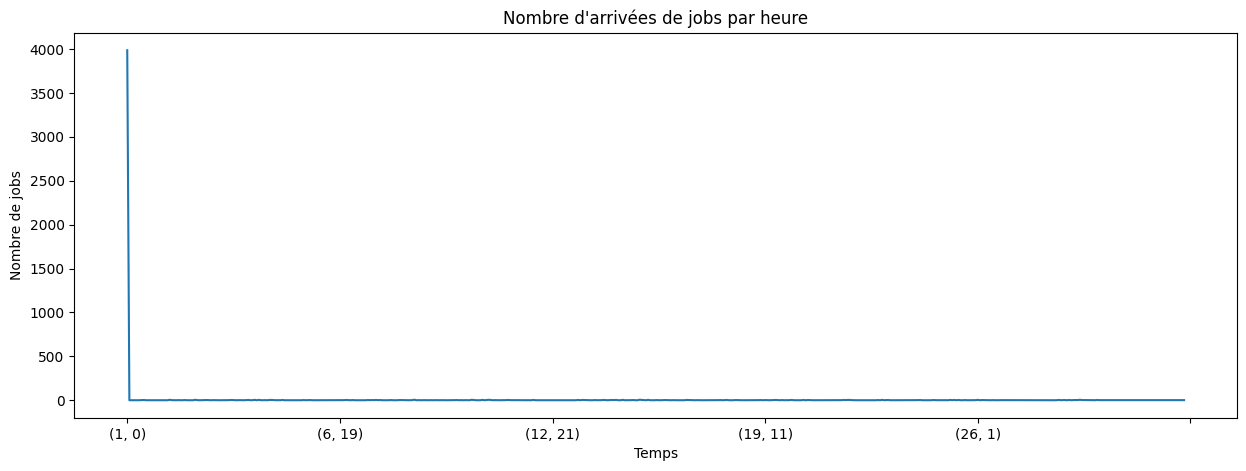

In [ ]:
import os
os.makedirs('../results/figures', exist_ok=True)
arrivals_per_hour = df_submit.groupby(['day', 'hour']).size()
plt.figure(figsize=(15, 5))
arrivals_per_hour.plot()
plt.title('Nombre d\'arrivées de jobs par heure')
plt.xlabel('Temps')
plt.ylabel('Nombre de jobs')
plt.savefig('../results/figures/arrivals_temporal_pattern.png')